# Proyek Klasifikasi Gambar: Klasifikasi gambar pada buah jambu
- **Nama:** Saila Julia
- **Email:** mc459d5x2115@student.devacademy.id
- **ID Dicoding:** MC459D5X2115

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install split-folders

In [ ]:
import numpy as np
import tensorflow as tf
import splitfolders
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

## Data Preparation

### Data Loading

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"saaiill","key":"1d5f918e33c39755ce624b45e4d6dcf3"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download kaggle dataset and unzip the file
# !cp kaggle.json ~/.kaggle/

# !chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d asadullahgalib/guava-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/asadullahgalib/guava-disease-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 93% 1.42G/1.52G [00:12<00:02, 39.2MB/s]
100% 1.52G/1.52G [00:12<00:00, 135MB/s] 


In [ ]:
!unzip -q guava-disease-dataset.zip

### Data Preprocessing

#### Split Dataset

In [ ]:
input_folder = "/content/GuavaDiseaseDataset/GuavaDiseaseDataset/train"
output_folder = "/content/GuavaDisease_split"

splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(0.6, 0.2, 0.2))
#60% data akan digunakan sebagai train set dan 40% sebagai validation set.

Copying files: 2647 files [00:06, 440.88 files/s]


In [ ]:
base_dir = "/content/GuavaDisease_split"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'val')

classes=['Healthy_guava', 'fruit_fly', 'Anthracnose']

## Modelling

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
)


validation_datagen = ImageDataGenerator(rescale=1.0/255)

test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                              batch_size=32,
                                              target_size=(150,150),
                                              color_mode="grayscale",
                                              class_mode='categorical',
                                              shuffle=True)


validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                   batch_size=32,
                                                   target_size=(150,150),
                                                   color_mode="grayscale",
                                                   class_mode='categorical',
                                                   shuffle=False)


test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(150,150),
                                                  color_mode="grayscale",
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 1587 images belonging to 3 classes.
Found 528 images belonging to 3 classes.
Found 532 images belonging to 3 classes.


In [ ]:
# tf.keras.backend.clear_session()

model_1 = Sequential()

# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,1)))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(64, (4, 4),padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(64, (4, 4), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# Flatten layer
model_1.add(Flatten())
# 1nd Dense Layer
model_1.add(Dense(128, activation = 'relu'))
# 1nd Dropout Layer
model_1.add(Dropout(0.5))
# 2nd Dense Layer
model_1.add(Dense(64, activation = 'relu'))
# 2nd Dropout Layer
model_1.add(Dropout(0.3))

# Final Dense layer => For output prediction 1 mean (binary class in dataset), sigmoid for binary cases
model_1.add(Dense(3, activation='softmax'))

model_1.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Summary of the Model Architecture
print(model_1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,762,179 (10.54 MB)

 Trainable params: 2,761,859 (10.54 MB)

 Non-trainable params: 320 (1.25 KB)

None


## Evaluasi dan Visualisasi

In [ ]:
history = model_1.fit(
      train_generator,
      epochs=30, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 508ms/step - accuracy: 0.5329 - loss: 4.7360 - val_accuracy: 0.5057 - val_loss: 1.9860
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 359ms/step - accuracy: 0.5700 - loss: 2.1632 - val_accuracy: 0.2443 - val_loss: 5.6360
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 344ms/step - accuracy: 0.5502 - loss: 1.5131 - val_accuracy: 0.2443 - val_loss: 3.2664
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 382ms/step - accuracy: 0.5556 - loss: 1.0389 - val_accuracy: 0.2443 - val_loss: 5.9118
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 344ms/step - accuracy: 0.6061 - loss: 0.9967 - val_accuracy: 0.2443 - val_loss: 8.7358
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 350ms/step - accuracy: 0.6256 - loss: 0.9263 - val_accuracy: 0.2443 - val_loss: 14.0165
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 350ms/step - accuracy: 0.6678 - loss: 0.8807 - val_accuracy: 0.2443 - val_loss: 12.6145
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 345ms/step - accuracy: 0.6993 - loss: 0.7552 - val_ac

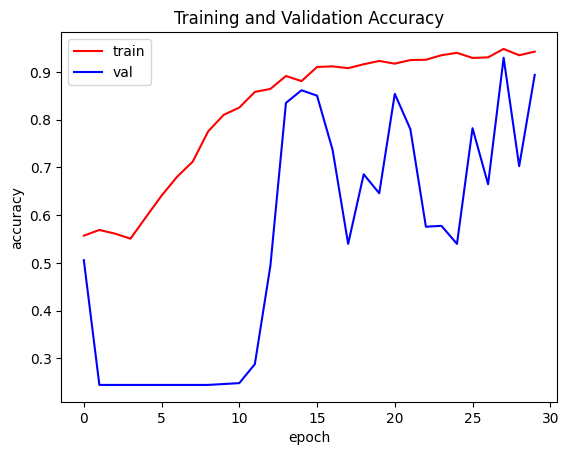

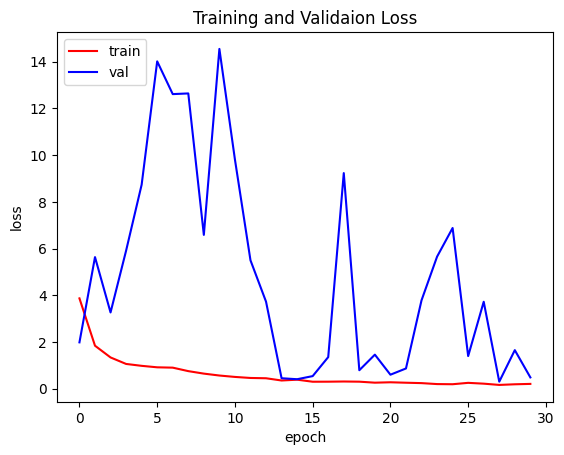

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

In [ ]:
import numpy as np

# Mengukur akurasi test set
loss, accuracy = model_1.evaluate(test_generator)
print(f"Akurasi pada data testing: {accuracy * 100:.2f}%")
# classification report
y_pred_prob = model_1.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

532/532 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9737 - loss: 0.1875
Akurasi pada data testing: 91.17%
532/532 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
               precision    recall  f1-score   support

  Anthracnose       0.84      1.00      0.91       216
    fruit_fly       0.97      0.91      0.94       185
healthy_guava       1.00      0.76      0.87       131

     accuracy                           0.91       532
    macro avg       0.94      0.89      0.91       532
 weighted avg       0.92      0.91      0.91       532



## Konversi Model

## TF_JS

In [ ]:
model_1.save("model.h5")

In [ ]:
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

2025-05-18 05:17:57.989048: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747545478.008384    5259 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747545478.014422    5259 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
shutil.make_archive('tfjs_model', 'zip', 'tfjs_model')
files.download('tfjs_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## TF_Lite

In [ ]:
export_dir = 'saved_model/'
tf.saved_model.save(model_1, export_dir)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
!pip install pathlib

In [ ]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

16592

In [ ]:
shutil.make_archive('saved_model', 'zip', 'saved_model')

'/content/saved_model.zip'

In [ ]:
files.download('saved_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference (Optional)